<a href="https://colab.research.google.com/github/ckdlsqpf/projectmanager/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = \
    tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [13]:
from PIL import Image
Image.fromarray(x_train[0])  # 훈련용 이미지 0번을 그림으로 보기

In [14]:
import numpy as np
def filter_dataset(x, y, neg_cls, pos_cls):
    # x와 y에서 neg_cls와 pos_cls만 추려내는 함수
    m = (y == pos_cls) | (y == neg_cls)
    x = x[m]
    y = y[m]
    y = np.where(y == neg_cls, 0, 1)
    return x, y

x_train2, y_train2 = filter_dataset(x_train, y_train, 0, 1)

In [15]:
y_train2

array([0, 1, 1, ..., 1, 0, 1])

In [19]:
Image.fromarray(x_train2[1])

In [30]:
from tensorflow.keras.layers import *
model = tf.keras.Sequential([
    Flatten(),
    Dense(1, activation='sigmoid'),
])

In [23]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
result = model.fit(x_train2, y_train2, epochs=10)

Epoch 1/10
396/396 [==============================] - 1s 2ms/step - loss: 0.0064 - accuracy: 0.9996
Epoch 2/10
396/396 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9994
Epoch 3/10
396/396 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9996
Epoch 4/10
396/396 [==============================] - 1s 2ms/step - loss: 3.2604e-04 - accuracy: 0.9999
Epoch 5/10
396/396 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9997
Epoch 6/10
396/396 [==============================] - 1s 2ms/step - loss: 0.0032 - accuracy: 0.9998
Epoch 7/10
396/396 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 0.9998
Epoch 8/10
396/396 [==============================] - 1s 2ms/step - loss: 4.6129e-05 - accuracy: 1.0000
Epoch 9/10
396/396 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9996
Epoch 10/10
396/396 [==============================] - 1s 2ms/step - loss: 8.2438e-04 - accu

In [31]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
result = model.fit(x_train2, y_train2, validation_split=0.1, epochs=10)
# validation_split: 성능테스트 # epochs: 몇 번 돌릴지 (돌릴수록 손실이 줄어들고 정확도가 올라감)

Epoch 1/10
357/357 [==============================] - 1s 2ms/step - loss: 1.8497 - accuracy: 0.9662 - val_loss: 0.0679 - val_accuracy: 0.9968
Epoch 2/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0936 - accuracy: 0.9982 - val_loss: 0.0573 - val_accuracy: 0.9984
Epoch 3/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0611 - accuracy: 0.9984 - val_loss: 0.0475 - val_accuracy: 0.9984
Epoch 4/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0519 - accuracy: 0.9988 - val_loss: 0.0558 - val_accuracy: 0.9984
Epoch 5/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0483 - accuracy: 0.9986 - val_loss: 1.0039e-05 - val_accuracy: 1.0000
Epoch 6/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0228 - accuracy: 0.9989 - val_loss: 0.0287 - val_accuracy: 0.9984
Epoch 7/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0317 - accuracy: 0.9987 - val_loss: 5.6667e-04 - val_accuracy: 1.000

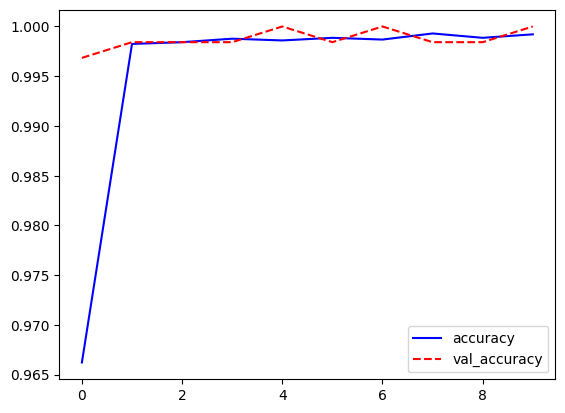

In [32]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], 'b-', label='accuracy')
plt.plot(result.history['val_accuracy'], 'r--', label='val_accuracy')
plt.legend()

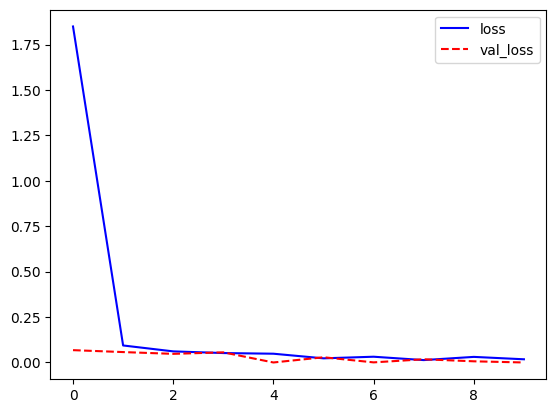

In [33]:
plt.plot(result.history['loss'], 'b-', label='loss')
plt.plot(result.history['val_loss'], 'r--', label='val_loss')
plt.legend()

**epochs**
- Early Stopping: 100번을 하기로 했어도 성능이 떨어지기 시작하면 일찍 멈춤
- Checkpoint: 중간중간 저장을 해놨다가 제일 성능이 좋았던 시점을 다시 불러온다
https://playground.tensorflow.org/